
# 🐼 Pandas for Machine Learning  
 Introduction to Machine Learning  
**Topic:** Data Analysis and Manipulation using pandas  



## 1. Introduction

Pandas is one of the most essential Python libraries for **data analysis and preprocessing**.  
It builds on top of NumPy and provides two main data structures:

- **Series** – 1D labeled array  
- **DataFrame** – 2D labeled table  

Pandas is the backbone of almost every ML workflow because it allows you to:
- Load and explore datasets
- Clean and transform data
- Prepare features for modeling


## 2. Series

In [ ]:

import pandas as pd

# Creating a Series
s = pd.Series([10, 20, 30, 40, 50], name="Scores")
print("Series:")
print(s)

# Accessing elements
print("\nFirst element:", s.iloc[0])
print("Mean:", s.mean())


Series:
0    10
1    20
2    30
3    40
4    50
Name: Scores, dtype: int64

First element: 10
Mean: 30.0


## 3. DataFrames

In [ ]:

# Creating a DataFrame from a dictionary
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Age": [25, 30, 35, 40, 28],
    "Score": [85, 90, 88, 70, 95]
}

df = pd.DataFrame(data)
print(df)

# Basic info
print("\nInfo:")
print(df.info())

# Summary stats
print("\nDescribe:")
print(df.describe())


      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     88
3    David   40     70
4      Eva   28     95

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Score   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes
None

Describe:
            Age      Score
count   5.00000   5.000000
mean   31.60000  85.600000
std     5.94138   9.449868
min    25.00000  70.000000
25%    28.00000  85.000000
50%    30.00000  88.000000
75%    35.00000  90.000000
max    40.00000  95.000000


## 4. Selecting and Filtering Data

In [ ]:

# Selecting columns
print(df["Name"])

# Selecting multiple columns
print(df[["Name", "Score"]])

# Filtering
high_scores = df[df["Score"] > 85]
print("\nStudents with Score > 85:")
print(high_scores)


0      Alice
1        Bob
2    Charlie
3      David
4        Eva
Name: Name, dtype: object
      Name  Score
0    Alice     85
1      Bob     90
2  Charlie     88
3    David     70
4      Eva     95

Students with Score > 85:
      Name  Age  Score
1      Bob   30     90
2  Charlie   35     88
4      Eva   28     95


## 5. Data Cleaning

In [ ]:

# Introducing missing values
df.loc[2, "Score"] = None
print(df)
print ("-------------------------\n")

# Detect missing
print(df.isna())

# Fill missing values
df["Score"].fillna(df["Score"].mean(), inplace=True)
print("\nAfter filling missing values:")
print(df)


      Name  Age  Score  Passed Age Group
0    Alice   25   85.0    True     Young
1      Bob   30   90.0    True     Adult
2  Charlie   35    NaN    True     Adult
3    David   40   70.0   False     Adult
4      Eva   28   95.0    True     Young
-------------------------

    Name    Age  Score  Passed  Age Group
0  False  False  False   False      False
1  False  False  False   False      False
2  False  False   True   False      False
3  False  False  False   False      False
4  False  False  False   False      False

After filling missing values:
      Name  Age  Score  Passed Age Group
0    Alice   25   85.0    True     Young
1      Bob   30   90.0    True     Adult
2  Charlie   35   85.0    True     Adult
3    David   40   70.0   False     Adult
4      Eva   28   95.0    True     Young


## 6. Data Transformation

In [ ]:

# Create a new column
df["Passed"] = df["Score"] >= 75

# Apply function
df["Age Group"] = df["Age"].apply(lambda x: "Young" if x < 30 else "Adult")
print(df)


      Name  Age  Score  Passed Age Group
0    Alice   25   85.0    True     Young
1      Bob   30   90.0    True     Adult
2  Charlie   35   85.0    True     Adult
3    David   40   70.0   False     Adult
4      Eva   28   95.0    True     Young


## 7. Grouping and Aggregation

In [ ]:

# Group by Age Group
grouped = df.groupby("Age Group")["Score"].mean()
print(grouped)


Age Group
Adult    81.666667
Young    90.000000
Name: Score, dtype: float64


## 8. Merging & Joining

In [ ]:

city_data = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "City": ["New York", "London", "Paris", "Berlin", "Tokyo"]
})

merged_df = pd.merge(df, city_data, on="Name")
print(merged_df)


      Name  Age  Score  Passed Age Group      City
0    Alice   25   85.0    True     Young  New York
1      Bob   30   90.0    True     Adult    London
2  Charlie   35   85.0    True     Adult     Paris
3    David   40   70.0   False     Adult    Berlin
4      Eva   28   95.0    True     Young     Tokyo


## 9. 🧩 Mini Project: Random Data Simulation & Analysis

          MathScore  EnglishScore    Average
City                                        
Berlin    71.482610     64.478890  67.980750
London    69.279159     64.851111  67.065135
New York  70.528082     60.325198  65.426640
Tokyo     67.371844     63.981737  65.676790


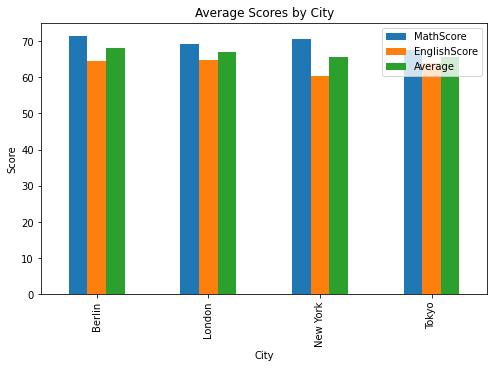

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Simulate random dataset
np.random.seed(42)
students = pd.DataFrame({
    "StudentID": range(1, 101),
    "Age": np.random.randint(18, 30, 100),
    "MathScore": np.random.normal(70, 10, 100),
    "EnglishScore": np.random.normal(65, 12, 100),
    "City": np.random.choice(["New York", "London", "Tokyo", "Berlin"], 100)
})

# Basic cleaning
students["MathScore"] = np.clip(students["MathScore"], 0, 100)
students["EnglishScore"] = np.clip(students["EnglishScore"], 0, 100)

# Add average
students["Average"] = students[["MathScore", "EnglishScore"]].mean(axis=1)

# Group by city
city_stats = students.groupby("City")[["MathScore", "EnglishScore", "Average"]].mean()
print(city_stats)

# Plot
city_stats.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by City")
plt.ylabel("Score")
plt.show()



## 10. 🏋️ Exercises

1. Create a pandas `Series` of 5 random integers between 10 and 50.  
2. Load a `DataFrame` from a dictionary with columns: `Name`, `Department`, `Salary`.  
3. Filter all rows where `Salary` > 50000.  
4. Introduce missing values and fill them with the column mean.  
5. Add a new column that categorizes salaries as `"Low"`, `"Medium"`, or `"High"`.  
6. Group by `Department` and calculate the average salary.  
7. Merge your DataFrame with another that contains `Department` and `City`.  
8. Create a simple bar plot showing average salary per department.  
